# 1. Scikit-learn PCA 實作

In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ds = datasets.load_wine()
df = pd.DataFrame(ds.data, columns = ds.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [3]:
from sklearn.model_selection import train_test_split
# 指定X、Y
X = df.values
y = ds.target

# 資料分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

# 查看陣列維度
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((142, 13), (36, 13), (142,), (36,))

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
X_train_pca.shape, X_test_pca.shape

((142, 2), (36, 2))

In [6]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [7]:
clf.fit(X_train_pca, y_train)

LogisticRegression()

In [8]:
from sklearn.metrics import accuracy_score
# 計算準確率
y_pred = clf.predict(X_test_pca)
print(f'{accuracy_score(y_test, y_pred) * 100:.2f}%')

100.00%


# 2. Scikit-learn LDA實作

In [9]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
ds = datasets.load_wine()
df = pd.DataFrame(ds.data, columns = ds.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 指定X、Y
X = df.values
y = ds.target

# 資料分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

# 查看陣列維度
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((142, 13), (36, 13), (142,), (36,))

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [14]:
lda = LDA(n_components = 2)
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)
X_train_lda.shape, X_test_lda.shape

((142, 2), (36, 2))

In [15]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [16]:
clf.fit(X_train_lda, y_train)

LogisticRegression()

In [17]:
# 計算準確率
y_pred = clf.predict(X_test_lda)
print(f'{accuracy_score(y_test, y_pred) * 100:.2f}%') 

97.22%


# 3. 簡單線性回歸導論

簡單線性回歸的核心公式是找到最佳擬合直線，即所謂的回歸線，其公式可以表示為：

$ y = \beta_0 + \beta_1 x $

其中：
- y 是應變量（依賴變量）。
- x 是自變量（獨立變量）。
- beta_0 是截距，即直線在 y 軸的交點。
- beta_1 是斜率，表示 x 變動一單位時 y 的變動量。

## 3-1. 參數估計
使用最小二乘法來估計 $ \beta_0 $ 和 $ \beta_1 $，計算公式如下：

$ beta_1 = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2} $

$ beta_0 = \bar{y} - \beta_1 \bar{x} $

其中：
- $ \bar{x} $ 和 $ \bar{y} $ 分別是 x 和 y 的平均值。
- n 是數據點的數量。

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv('./Advertising.csv')

In [20]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [21]:
df["total_spend"] = df["TV"] + df["radio"] + df["newspaper"]

<Axes: xlabel='total_spend', ylabel='sales'>

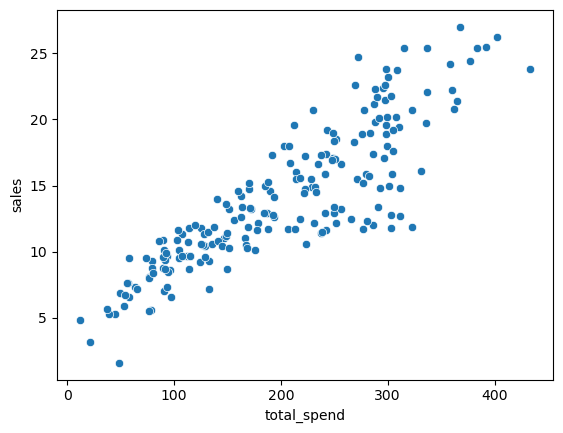

In [22]:
sns.scatterplot(x="total_spend", y="sales", data = df)

<Axes: xlabel='total_spend', ylabel='sales'>

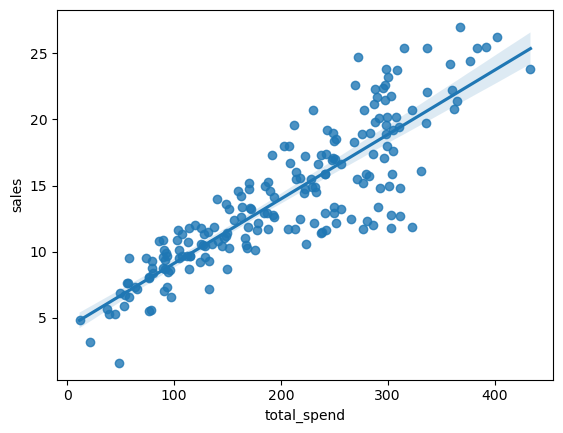

In [23]:
sns.regplot(x="total_spend", y="sales", data = df)

In [24]:
# 定義 x 和 y
x = df['total_spend']
y = df['sales']
x_mean = np.mean(x)
y_mean = np.mean(y)
beta_1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)
beta_0 = y_mean - beta_1 * x_mean
print(f"y = {beta_0:.2f} + {beta_1:.2f}x")

y = 4.24 + 0.05x


## 3-2. Linear_Regression 使用矩陣計算

## 3-2-1. 載入套件

In [25]:
import numpy as np

In [26]:
year = [1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
        1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
        1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
        1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
        1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
        2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
        2016, 2017, 2018, 2019, 2020]
pop = [2.53, 2.57, 2.62, 2.67, 2.71, 2.76, 2.81, 2.86, 2.92, 2.97, 3.03,
       3.08, 3.14, 3.2 , 3.26, 3.33, 3.4 , 3.47, 3.54, 3.62, 3.69, 3.77,
       3.84, 3.92, 4.  , 4.07, 4.15, 4.22, 4.3 , 4.37, 4.45, 4.53, 4.61,
       4.69, 4.78, 4.86, 4.95, 5.05, 5.14, 5.23, 5.32, 5.41, 5.49, 5.58,
       5.66, 5.74, 5.82, 5.9 , 5.98, 6.05, 6.13, 6.2 , 6.28, 6.36, 6.44,
       6.51, 6.59, 6.67, 6.75, 6.83, 6.92, 7.  , 7.08, 7.16, 7.24, 7.32,
       7.4 , 7.48, 7.56, 7.64, 7.72]

## 3-2-2. 世界人口數預測

In [27]:
# 轉換為2維
X = np.array(year).reshape(-1, 1)
y = np.array(pop).reshape(-1, 1)
X.shape, y.shape

((71, 1), (71, 1))

In [28]:
one = np.ones((X.shape[0], 1))
one.shape

(71, 1)

In [29]:
X = np.concatenate((X, one), axis = 1)
X

array([[1.950e+03, 1.000e+00],
       [1.951e+03, 1.000e+00],
       [1.952e+03, 1.000e+00],
       [1.953e+03, 1.000e+00],
       [1.954e+03, 1.000e+00],
       [1.955e+03, 1.000e+00],
       [1.956e+03, 1.000e+00],
       [1.957e+03, 1.000e+00],
       [1.958e+03, 1.000e+00],
       [1.959e+03, 1.000e+00],
       [1.960e+03, 1.000e+00],
       [1.961e+03, 1.000e+00],
       [1.962e+03, 1.000e+00],
       [1.963e+03, 1.000e+00],
       [1.964e+03, 1.000e+00],
       [1.965e+03, 1.000e+00],
       [1.966e+03, 1.000e+00],
       [1.967e+03, 1.000e+00],
       [1.968e+03, 1.000e+00],
       [1.969e+03, 1.000e+00],
       [1.970e+03, 1.000e+00],
       [1.971e+03, 1.000e+00],
       [1.972e+03, 1.000e+00],
       [1.973e+03, 1.000e+00],
       [1.974e+03, 1.000e+00],
       [1.975e+03, 1.000e+00],
       [1.976e+03, 1.000e+00],
       [1.977e+03, 1.000e+00],
       [1.978e+03, 1.000e+00],
       [1.979e+03, 1.000e+00],
       [1.980e+03, 1.000e+00],
       [1.981e+03, 1.000e+00],
       [

In [30]:
w = np.linalg.inv(X.T @ X) @ X.T @y
w

array([[ 7.72102616e-02],
       [-1.48313919e+02]])

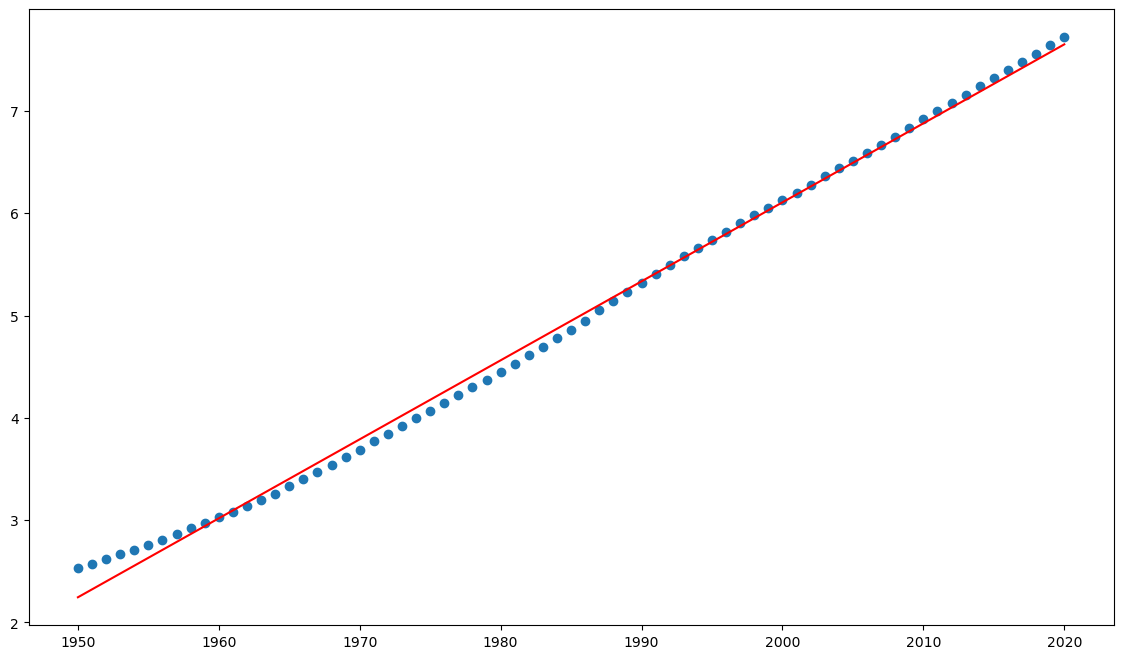

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize = (14,8))
plt.scatter(X[:, 0], y[:, 0])
plt.plot(X[:, 0], X[:, 0] * w[0, 0] + w[1, 0],'r')
plt.show()

## 3-2-3. Scikit-learn

In [32]:
from sklearn.linear_model import LinearRegression
X = np.array(year).reshape(-1, 1)
y = np.array(pop)
reg = LinearRegression()
reg.fit(X, y)
reg.coef_,reg.intercept_

(array([0.07721026]), -148.31391851106642)

In [33]:
print(f"y = {reg.coef_[0]:.4f} * x + {reg.intercept_:.4f}")

y = 0.0772 * x + -148.3139


## 3-2-4. 算2050、2060年世界人口數


In [34]:
a1 = reg.coef_[0] * 2050 + reg.intercept_
a1 * 10000000000

99671177062.37445

## 3-2-5. 建立線性回歸模型儲存測試

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import joblib

In [36]:
df = pd.read_csv("./Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [37]:
X = df[["TV","radio","newspaper"]]
y = df["sales"]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [39]:
# 數據縮放
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [41]:
y_pred = model.predict(X_test_scaled)

In [42]:
mse = mean_squared_error(y_test, y_pred)
print(f"MSE = {mse:.2f}")

MSE = 3.80


In [43]:
# 保存模型和縮放器
joblib.dump((model, scaler),"scaled_sales_model.pkl")

['scaled_sales_model.pkl']

In [44]:
input_data = {}
input_data["TV"] = 250.1
input_data["radio"] = 42.8
input_data["newspaper"] = 51.2
mydf = pd.DataFrame([input_data])
print(mydf)

      TV  radio  newspaper
0  250.1   42.8       51.2


In [45]:
import joblib
model, scaler = joblib.load("scaled_sales_model.pkl")
scaler_mydf = scaler.transform(mydf)
model.predict(scaler_mydf)

array([22.61006168])